# Obter dados

In [311]:
from sklearn.datasets import load_boston
boston = load_boston()

In [312]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [313]:
X, y = boston.data, boston.target

In [314]:
X.shape, y.shape

((506, 13), (506,))

0


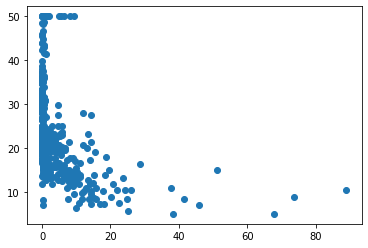

1


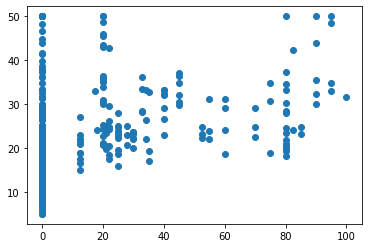

2


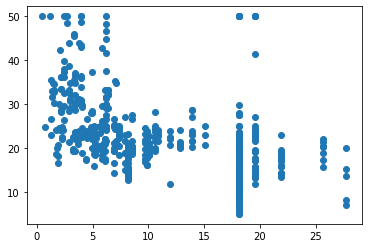

3


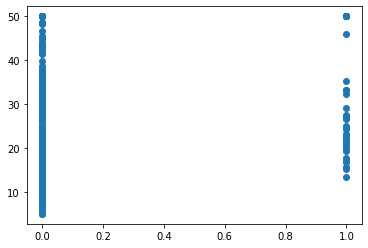

4


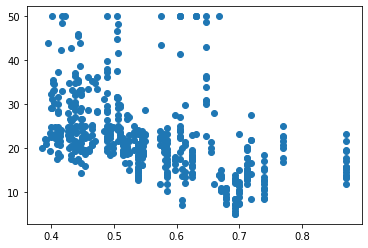

5


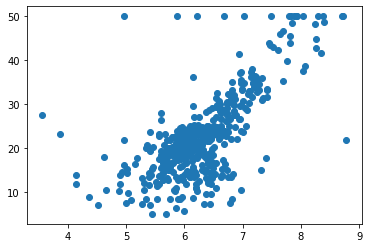

6


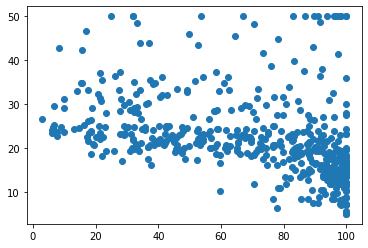

7


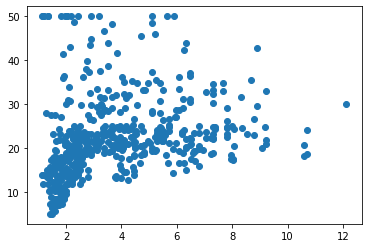

8


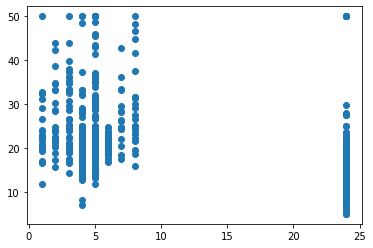

9


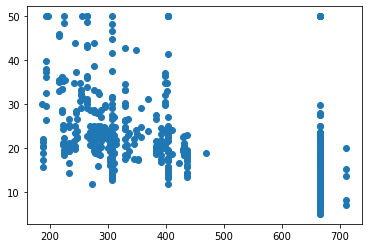

10


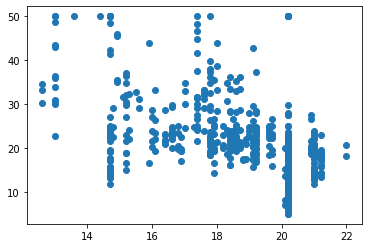

11


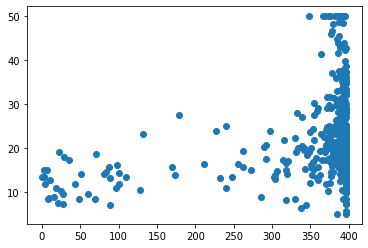

12


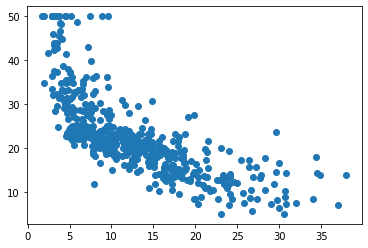

In [315]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

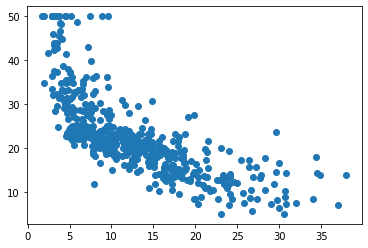

In [316]:
plt.scatter(X[:,12],y)

# Solução

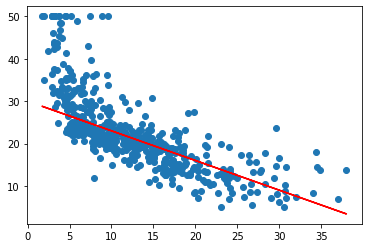

In [317]:
def modelo(x, a, b):
    y = a*x + b
    return y
x = X[:,12:13]
ypred = modelo(x, -0.7, 30)
plt.scatter(x, y)
plt.plot(x, ypred, 'r')
plt.show()

# Métrica de avaliação

In [318]:
from math import sqrt

def rmse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return sqrt(mse)

In [319]:
ypred = modelo(x, -1, 40)
rmse(y, ypred)

7.860394580708203

In [320]:
ypred = modelo(x, -0.7, 30)
rmse(y, ypred)

6.602806949970377

In [321]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y, ypred):
    mse = mean_squared_error(y,ypred)
    return sqrt(mse)

rmse(y, ypred)

6.602806949970374

# Método de aprendizado

In [322]:
class regressao_linear:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def predict(self, x):
        y = self.a*x + self.b
        return y

modelo_rl = regressao_linear(-0.7, 30)
ypred = modelo_rl.predict(x)
rmse(y, ypred)

6.602806949970374

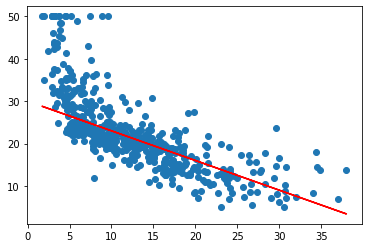

In [323]:
plt.scatter(x, y)
plt.plot(x, ypred, 'r')
plt.show()

# Ajuste automático

rmse inicial: 22.39583882193322
rmse final: 6.203482144396323


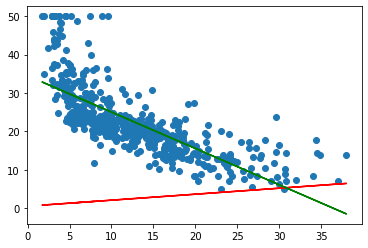

In [347]:
from random import random

def rms(array):
    return sum(array**2)/len(array)

class regressao_linear:
    def __init__(self):
        self.a = random()
        self.b = random()

    def fit(self, x, y):
        if len(y.shape)<2:
            y = y.reshape(-1,1)
        for _ in range(300):
            ypred = self.predict(x)
            erro = ypred - y
            # mse = rms(erro)
            # print(mse) 
            ajusteA = sum([erro[i]*x[i] for i in range(len(x))])/sum(x)
            self.a = self.a - 0.1*ajusteA
            ajusteB = sum([erro[i] for i in range(len(erro))])/len(erro)
            self.b = self.b - 0.1*ajusteB

    def predict(self, x):
        y = self.a*x + self.b
        return y

modelo_rl = regressao_linear()
plt.scatter(x, y)

ypred = modelo_rl.predict(x)
erro = rmse(y, ypred)
print(f"rmse inicial: {erro}")
plt.plot(x, ypred, 'r')

modelo_rl.fit(x, y)

ypred = modelo_rl.predict(x)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(x, ypred, 'g')

plt.show()


# Limpando o modelo

rmse inicial: 18.080906788085514
rmse final: 6.203483046664165


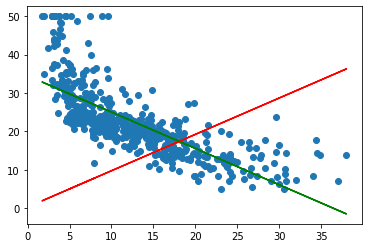

In [449]:
from random import random
import numpy as np

# def rms(array):
#     return sum(array**2)/len(array)

class regressao_linear:
    def __init__(self):
        self.w = np.random.rand(2,1)

    @staticmethod
    def addBias(x):
        bias = np.ones((x.shape[0],1))
        X_b = np.concatenate((bias,x),axis=1)
        return X_b

    def fit(self, x, y):
        X_b = self.addBias(x)
        if len(y.shape)<2:
            y = y.reshape(-1,1)
        for _ in range(300):
            ypred = self.predict(x)
            erro = ypred - y
            # print(ypred.shape, y.shape, erro.shape, x.shape)
            # # mse = rms(erro)
            # # print(mse) 
            # # ajusteA = sum([erro[i]*x[i] for i in range(len(x))])/sum(x)
            # ajusteA = x.T.dot(erro)/sum(x)
            # self.w[1] = self.w[1] - 0.1*ajusteA
            # ajusteB = sum([erro[i] for i in range(len(erro))])/len(erro)
            # self.w[0] = self.w[0] - 0.1*ajusteB
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste

    def predict(self, x):
        # y = self.w[1]*x + self.w[0]
        X_b = self.addBias(x)
        y = X_b.dot(self.w)
        return y

modelo_rl = regressao_linear()
plt.scatter(x, y)

ypred = modelo_rl.predict(x)
erro = rmse(y, ypred)
print(f"rmse inicial: {erro}")
plt.plot(x, ypred, 'r')

modelo_rl.fit(x, y)

ypred = modelo_rl.predict(x)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(x, ypred, 'g')

plt.show()

# Modelo multivariado

rmse final: 8.092959983183547


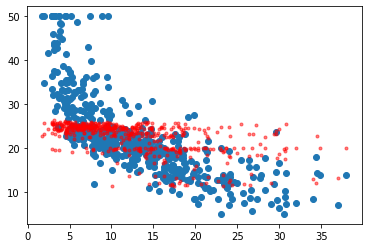

In [501]:
from random import random
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

# class regressao_linear:
class regressao_linear(BaseEstimator, RegressorMixin):
    def __init__(self):
        # self.w = np.random.rand(2,1)
        pass

    @staticmethod
    def nomalize(X):
        xmin = np.min(X)
        xmax = np.max(X)
        X_norm = (X-xmin)/(xmax-xmin)
        return X_norm

    @staticmethod
    # def addBias(x):
    #     bias = np.ones((x.shape[0],1))
    #     X_b = np.concatenate((bias,x),axis=1)
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_norm = regressao_linear.nomalize(X)
        X_b = np.concatenate((bias,X_norm),axis=1)
        return X_b

    # def fit(self, x, y):
    def fit(self, X, y):
        # X_b = self.addBias(x)
        X_b = self.addBias(X)
        self.w = np.random.rand(X_b.shape[1],1)
        if len(y.shape)<2:
            y = y.reshape(-1,1)
        for _ in range(300):
            # ypred = self.predict(x)
            ypred = self.predict(X)
            erro = ypred - y
            # ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            ajuste = X_b.T.dot(erro)/len(y)
            self.w = self.w - 0.1*ajuste

    # def predict(self, x):
    def predict(self, X):
        # X_b = self.addBias(x)
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

modelo_rl = regressao_linear()
plt.scatter(x, y)

# ypred = modelo_rl.predict(x)
# erro = rmse(y, ypred)
# print(f"rmse inicial: {erro}")
# plt.plot(x, ypred, 'r')

modelo_rl.fit(X, y)

ypred = modelo_rl.predict(X)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(x, ypred, '.r', alpha=0.5)

plt.show()

# sklearn.linear_model.LinearRegression

rmse final: 4.679191295697281


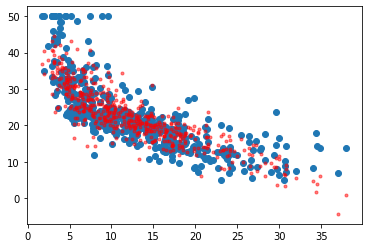

(36.459488385090125,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

In [454]:
from sklearn.linear_model import LinearRegression

modelo_rl = LinearRegression()
plt.scatter(x, y)

modelo_rl.fit(X, y)

ypred = modelo_rl.predict(X)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(x, ypred, '.r', alpha=0.5)

plt.show()
modelo_rl.intercept_, modelo_rl.coef_